# Context and Defining Problem Statement

The data we have at hand is of passengers and their feedback regarding their flight experience.

Each row is one passenger. Apart from the  feedback from the customers accross various attributes(15 in total) like food, online_support, cleanliness etc, we have data about the customers' age, loyalty to the airline, gender and class.

The target column is a binary variable which tells us if the customer is satisfied or neutral/dissatisfied

The task at hand is to analyze reasons for customers' satisfaction or dissatisfaction.

And finally, we build a model to predict customer satisfaction using all or some of the data we have

# Steps -
1. Data loading and preprocessing
2. Exploratory Data Analysis
3. Model building and evaluation
4. Model Tuning
5. Dimensionality Reduction

# Data loading and preprocessing

### 1. Import Pandas, Numpy, pyplot and seaborn

In [4]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity

### 2. Import the dataframes that are needed
- Import "Flight data_Train.csv" and "Surveydata_Train.csv"

In [5]:
df1 = pd.read_csv("Flight data_Train.csv")  # Read the data regarding customer attributes
df2 = pd.read_csv("Surveydata_Train.csv")   # Feedback data from customers

### 3. Join the two dataframes using the 'id' column as the primary key
- Rename the Id column of one dataframe so that there "id" column name becomes same

In [6]:
#Using pandas' Join method
#c = a.join(b)  # Joining two dfs on the 'Id' column

df = df2.set_index("Id").join(df1.set_index("ID"))


print(df.shape)
df.head()  # the combined dataframe

(90917, 23)


,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,neutral or dissatisfied,poor,acceptable,acceptable,manageable,poor,need improvement,poor,poor,acceptable,...,need improvement,poor,Male,Loyal Customer,30,Business travel,Business,1354,11,8.0
193378,satisfied,excellent,need improvement,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,...,excellent,acceptable,Female,disloyal Customer,20,NaN,Business,1439,6,0.0
174522,satisfied,good,good,good,manageable,acceptable,excellent,excellent,need improvement,need improvement,...,need improvement,excellent,Female,NaN,55,Personal Travel,Eco Plus,976,4,0.0
191830,satisfied,good,good,good,manageable,poor,good,poor,poor,poor,...,acceptable,poor,Male,disloyal Customer,24,Business travel,Eco,2291,0,0.0
221497,satisfied,good,good,NaN,Convinient,good,good,good,good,good,...,good,good,Male,Loyal Customer,32,Business travel,Business,3974,0,0.0


### 4. Print the number of missing values in each of the columns

In [7]:
df.isna().apply(pd.value_counts)    # isna() gives a boolean dataframe, value counts give us number of trues and falses

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
False,90917.0,90917.0,82673,82736,90917.0,90917.0,90917.0,90917.0,90917.0,83738,...,90917.0,90917.0,90917.0,81818,90917.0,81829,90917.0,90917.0,90917.0,90633
True,NaN,NaN,8244,8181,NaN,NaN,NaN,NaN,NaN,7179,...,NaN,NaN,NaN,9099,NaN,9088,NaN,NaN,NaN,284


In [8]:
df.isna().sum() # Since True is 1 and False is 0, if you do a sum of a boolean dataframe, we get the number of trues in each col

Satisfaction                            0
Seat_comfort                            0
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      7179
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                         0
Gender                                  0
CustomerType                         9099
Age                                     0
TypeTravel                           9088
Class                                   0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                   284
dtype: int64

In [9]:
df.isnull().apply(pd.value_counts)  # isna() and isnull() are exactly the same

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
False,90917.0,90917.0,82673,82736,90917.0,90917.0,90917.0,90917.0,90917.0,83738,...,90917.0,90917.0,90917.0,81818,90917.0,81829,90917.0,90917.0,90917.0,90633
True,NaN,NaN,8244,8181,NaN,NaN,NaN,NaN,NaN,7179,...,NaN,NaN,NaN,9099,NaN,9088,NaN,NaN,NaN,284


### 5. Drop all the rows having atleast one missing values and check the shape of the dataframe before and after dropping the rows
- Fill null values in ArrivalDelayin_Mins with mean
- After that drop all the rows with null values

In [10]:
# Since there are very less null values in the 'ArrivalDelayin_Mins' column, lets impute with mean

df.ArrivalDelayin_Mins.fillna(df.ArrivalDelayin_Mins.mean(), inplace = True)

In [11]:
df.ArrivalDelayin_Mins.isna().sum()

0

In [12]:
# Rest other missing values are filled with not_captured.
#It can be done in other way also or also can be dropped according to the problem and business context.
df.fillna("not_captured", inplace = True)


In [13]:
print(df.shape)

(90917, 23)


# Exploratory Data Analysis

### 6. Print correlation

In [14]:
cor = df.corr(numeric_only=True) # It will show correlation of only numerical variables here.

In [15]:
cor[cor > .90]

,Age,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Age,1.0,NaN,NaN,NaN
Flight_Distance,NaN,1.0,NaN,NaN
DepartureDelayin_Mins,NaN,NaN,1.00000,0.96112
ArrivalDelayin_Mins,NaN,NaN,0.96112,1.00000


In [16]:
to_drop = ['DepartureDelayin_Mins']

- There is just one obvious correlation that we can see that is between arrival delay and departure delay

### Feedback columns
Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location',
'Inflightwifi_service', 'Inflight_entertainment', 'Online_support',
'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service',
'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding'

### 7. Manually encode these variables(printed above) such that they follow an order based on the meaning.
### Example: awful = 1, unpleasent = 2, decent = 3, good = 4, great = 5

In [17]:
# Manual label encoding
# It is a bit of a subjective task. Hence, go ahead in the way you find appropriate

df.replace({'extremely poor' : 0, 'poor' : 1, 'need improvement' : 2, 'acceptable' : 3,
            'good' : 4, 'excellent' : 5, 'not_captured' : 2}, inplace = True)

df.replace({'very inconvinient' : 0, 'Inconvinient' : 1, 'need improvement' : 2, 'manageable' : 3,
            'Convinient' : 4, 'very convinient' : 5}, inplace = True)

In [18]:
df['Departure.Arrival.time_convenient'].value_counts()

Departure.Arrival.time_convenient
2    22783
4    18840
5    17079
3    14806
1    13210
0     4199
Name: count, dtype: int64

### 8. Display countplot of every feedback attribute with respect to Customer Satisfaction.

You can use sns.countplot and set hue  = 'Satisfaction'

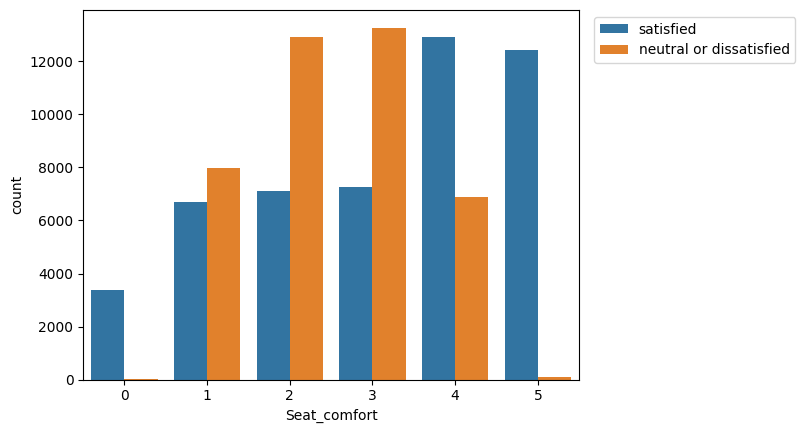

In [19]:
# We can use seaborn's countplot to plot a stacked baatchart
sns.countplot(data = df, x = 'Seat_comfort', hue = 'Satisfaction')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.45, 1))   # to place the legend in a 'good' position



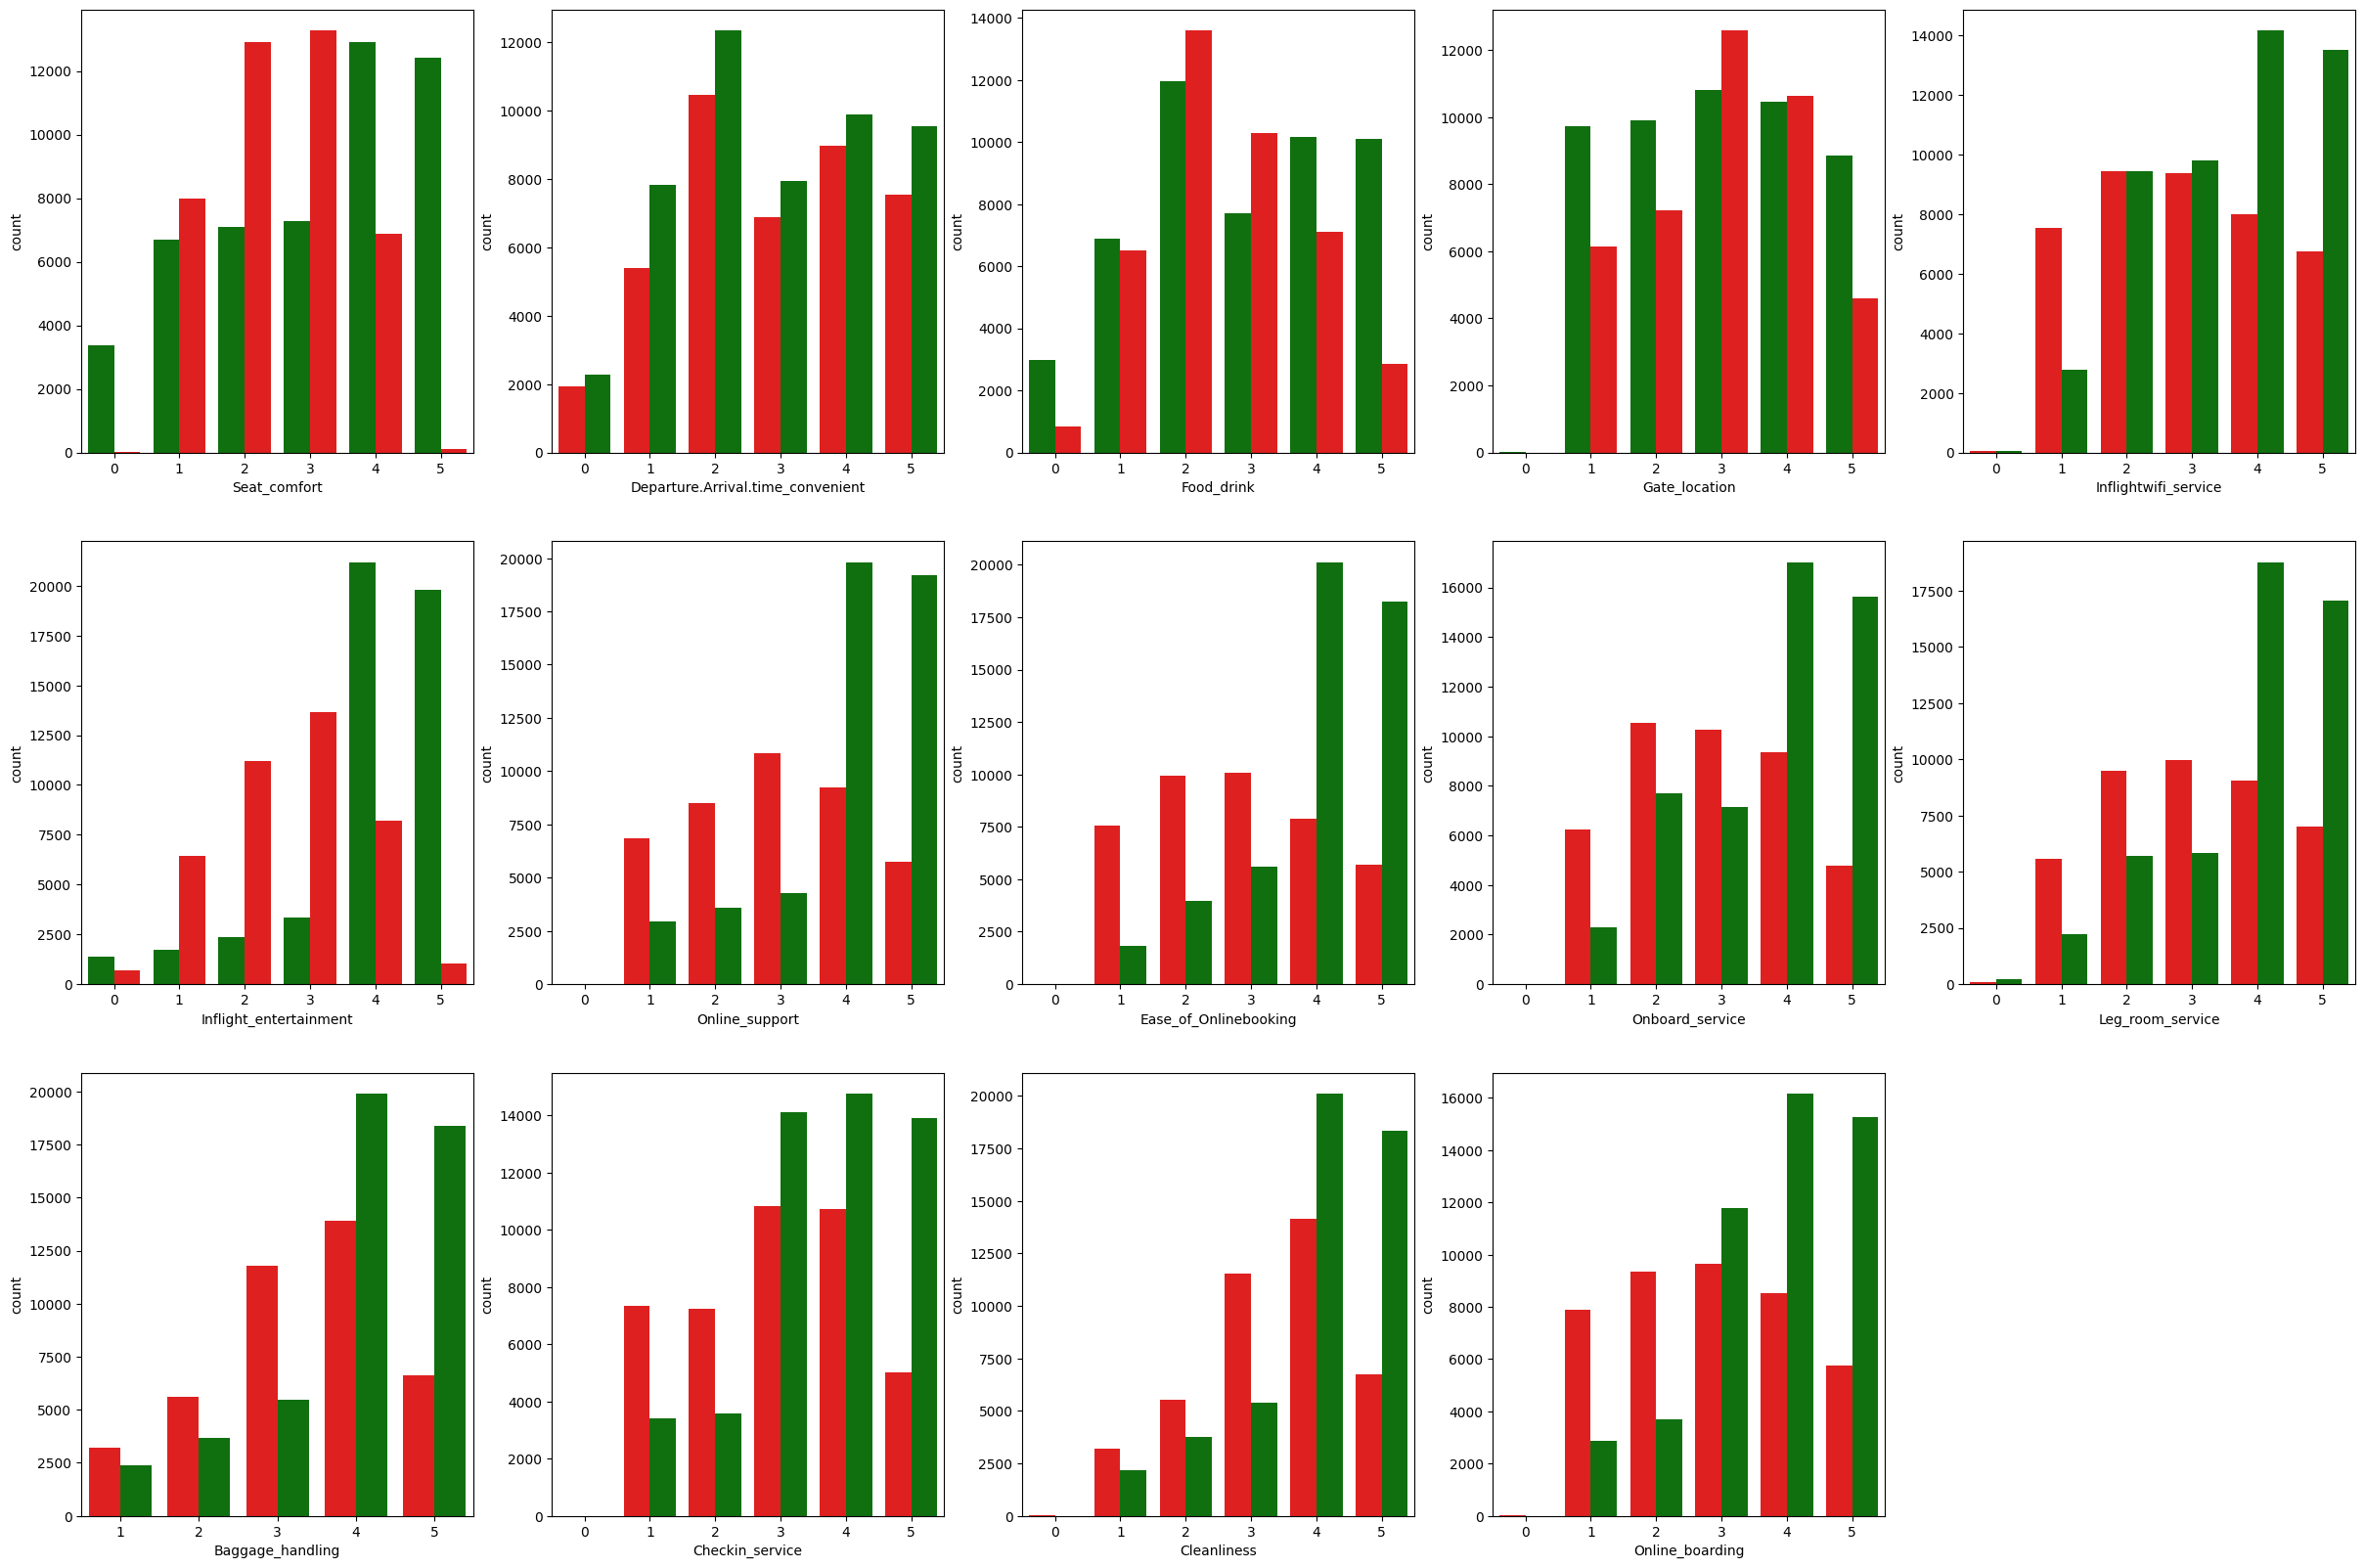

In [20]:
# Since there are a lot of columns that we want to plot, we can put all of them in one plot by using subplot()
# Additionally, since there are a lot of subplots that need to be plotted, we can use a for loop

plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback = [ 'Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
           'Gate_location', 'Inflightwifi_service','Inflight_entertainment',
           'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
           'Leg_room_service', 'Baggage_handling','Checkin_service', 'Cleanliness', 'Online_boarding']

for i in feedback:
    plt.subplot(3, 5, pos)
    sns.countplot(data = df, x = i, hue = 'Satisfaction',
                  palette = {'satisfied':'green','neutral or dissatisfied': 'red'})
    plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one

### 9. Draw all the insights that you can from the plots

**Green and orange bars are counts of satisfied and dissatisfied customers respectively. We want to look for areas where there is a visually significant difference between the length of the stacked bars**

- From the plots above,
    - Seating comfort can cause high levels of satisfaction to customers. Hardly any people who rated highly for seat_comfort were dissatisfied
    - A similar case with respect to inflight_entertainment. In this case, having less entertainment seems to have caused far more dissatisfaction compared to bad seating.
    - Difference is observed in ease_of_online_booking quiet evidently

### 10. Print the average feedback score
- When Satisfaction columns equals 'satisfied'
- When Satisfaction columns is not equal to 'satisfied'

In [21]:
Feedback_cols = ['Seat_comfort', 'Departure.Arrival.time_convenient',
                 'Food_drink', 'Gate_location', 'Inflightwifi_service',
                 'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
                 'Onboard_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service',
                 'Cleanliness', 'Online_boarding']

In [22]:
df.groupby('Satisfaction')[Feedback_cols].mean() # Average rating of individual feedback attributes across satisfaction levels


,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
Satisfaction,,,,,,,,,,,,,,
neutral or dissatisfied,2.469239,2.928127,2.603606,3.007848,2.923219,2.613058,2.962071,2.858563,2.900209,3.053164,3.368209,2.970673,3.381159,2.873530
satisfied,3.144511,2.882559,2.914210,2.975985,3.523121,4.021543,3.979864,3.985953,3.723297,3.845803,3.969695,3.646852,3.978115,3.748598


### 11. Draw any insights that you can from the above values

- Observe the Exreme values (lower side for 'dissatisfaction' and higher side for 'satisfaction')
- Bad seats are a strong cause for customer dissatisfication
- Time convenience doesn't seem to be that big of a deal
- Dissatisfied customers had some bad experiences with food but average food seems to satisfy most people
- Gate location is totally irrelevant
- Wifi is quiet a factor. On an average, having good wifi yeilded customer satisfaction
- Easy online booking facility seems to be very important for customer satisfaction
- In flight entertainment seems to be a deal breaker

### 12. Achieve the following
- Print the number of people who are more than just satisfied with the "Inflight_entertainment" and yet were dissatisfied overall
- Print the number of people who are more than just satisfied with the "Inflight_entertainment" and were satisfied overall

In [23]:
df.Inflight_entertainment.value_counts()

Inflight_entertainment
4    29373
5    20786
3    16995
2    13527
1     8198
0     2038
Name: count, dtype: int64

In [24]:
# Number of people who got entertained well but were dissatisfied in the end
entertained_and_dissatisfied = df[(df.Inflight_entertainment > 3) & (df.Satisfaction != 'satisfied')]
print(100 * entertained_and_dissatisfied.shape[0]/df.shape[0], 'percent')

10.11581992366664 percent


In [25]:
# Number of customers who got entertained and were satisfied with the flight
entertained_and_satisfied = df[(df.Inflight_entertainment > 3) & (df.Satisfaction == 'satisfied')]
print(100 * entertained_and_satisfied.shape[0]/df.shape[0], 'percent')

45.054280277615845 percent


### 13. Create a new column which is the mean of 'Ease_of_Onlinebooking', 'Online_boarding', 'Online_support' and name it "avg_feedback_of_online_services".

DIY : If online services has a bad ratings then what is the average ratings of other feedback attributes?
And how does it impact Final Satisfaction of customers?

In [26]:
online_df = df.loc[:, ['Ease_of_Onlinebooking', 'Online_boarding', 'Online_support']]
online_df['avg_feedback_of_online_services'] = online_df.mean(axis = 1)

online_df['avg_feedback_of_online_services'].value_counts()


avg_feedback_of_online_services
4.000000    18368
3.000000    11888
5.000000    11047
2.000000     9124
4.333333     9039
3.666667     6470
1.000000     6278
4.666667     5871
3.333333     4462
2.666667     3593
2.333333     3176
1.666667     1180
1.333333      419
0.666667        2
Name: count, dtype: int64

-You might find that -  **A lot of things had to go well to satisfy the customers when the only services had a bad rating**

# Model building and evaluation

### 14. Encode the columns "Gender", "CustomerType", "TypeTravel", "Class", "Satisfaction"
- Use manual encoding or other type of encoding

In [27]:
# Number of classes in each of the categorical attributes
for i in df.columns:
    if df[i].dtype == 'O':
        print(i, '->', len(df[i].value_counts()))

Satisfaction -> 2
Gender -> 2
CustomerType -> 3
TypeTravel -> 3
Class -> 3


In [28]:
df.Class.value_counts()

Class
Business    43535
Eco         40758
Eco Plus     6624
Name: count, dtype: int64

In [29]:
#Manuanl Encoding
df.replace({'Loyal Customer' : 1, 'disloyal Customer' : 0,
               'Business travel' : 1, 'Personal Travel' : 0,
              'Female' : 0, 'Male' : 1,
               'satisfied' : 1, 'neutral or dissatisfied' : 0, 'Eco Plus': 0 , 'Eco': 1, 'Business': 2}, inplace = True)


In [30]:
#onehotencoding
df_coded = pd.get_dummies(df)

In [31]:
df_coded.columns

Index(['Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Class', 'Flight_Distance',
       'DepartureDelayin_Mins', 'ArrivalDelayin_Mins'],
      dtype='object')

In [32]:
df_coded.head()

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,0,1,3,3,3,1,2,1,1,3,...,2,1,1,1,30,1,2,1354,11,8.0
193378,1,5,2,5,4,3,5,3,3,4,...,5,3,0,0,20,2,2,1439,6,0.0
174522,1,4,4,4,3,3,5,5,2,2,...,2,5,0,2,55,0,0,976,4,0.0
191830,1,4,4,4,3,1,4,1,1,1,...,3,1,1,0,24,1,1,2291,0,0.0
221497,1,4,4,2,4,4,4,4,4,4,...,4,4,1,1,32,1,2,3974,0,0.0


# Scaling

In [33]:
df_coded.columns

Index(['Satisfaction', 'Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding', 'Gender',
       'CustomerType', 'Age', 'TypeTravel', 'Class', 'Flight_Distance',
       'DepartureDelayin_Mins', 'ArrivalDelayin_Mins'],
      dtype='object')

In [34]:
#Here we are going to use StandardScaler to scale our data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#What all columns to scale? I have preferred all columns except onehotencoded columns and target columns as
#scaling of target feature will not change anything as they already have values like 0 and 1 only.
#You may only scale numerical features and leave categorical features as required according to business problem need and results.
cols_to_scale = ['Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Age', 'Flight_Distance','DepartureDelayin_Mins', 'ArrivalDelayin_Mins']

df_coded[cols_to_scale] = scaler.fit_transform(df_coded[cols_to_scale].to_numpy())







In [35]:
df_coded.describe()

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
count,90917.000000,9.091700e+04,9.091700e+04,9.091700e+04,9.091700e+04,9.091700e+04,9.091700e+04,9.091700e+04,9.091700e+04,9.091700e+04,...,9.091700e+04,9.091700e+04,90917.000000,90917.000000,9.091700e+04,90917.000000,90917.000000,9.091700e+04,9.091700e+04,9.091700e+04
mean,0.547323,6.314754e-17,1.263732e-16,2.516523e-17,5.150276e-17,1.087888e-16,-9.999664e-17,1.427854e-16,7.178344e-17,1.252009e-16,...,-1.289718e-16,3.063594e-17,0.491998,0.935964,-7.502679e-17,0.821156,1.405986,9.558100e-17,6.252232e-19,-4.845480e-18
std,0.497758,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,0.499939,0.509999,1.000005e+00,0.588882,0.621997,1.000005e+00,1.000005e+00,1.000005e+00
min,0.000000,-2.037086e+00,-1.958795e+00,-1.984146e+00,-2.286429e+00,-2.463102e+00,-2.521293e+00,-2.690907e+00,-2.664014e+00,-2.616084e+00,...,-3.229837e+00,-2.579441e+00,0.000000,0.000000,-2.144599e+00,0.000000,0.000000,-1.881260e+00,-3.798023e-01,-3.863514e-01
25%,0.000000,-6.019276e-01,-6.093847e-01,-5.534125e-01,-7.572541e-01,-9.480736e-01,-1.031147e+00,-3.969552e-01,-1.131038e+00,-1.054571e+00,...,-6.166210e-01,-1.040613e+00,0.000000,1.000000,-8.226969e-01,0.000000,1.000000,-6.054198e-01,-3.798023e-01,-3.863514e-01
50%,1.000000,1.156515e-01,6.532063e-02,1.619542e-01,7.333284e-03,-1.905596e-01,4.589988e-01,3.676953e-01,4.019391e-01,5.069417e-01,...,2.544511e-01,4.982145e-01,0.000000,1.000000,3.653962e-02,1.000000,1.000000,-5.320492e-02,-3.798023e-01,-3.863514e-01
75%,1.000000,8.332305e-01,7.400259e-01,8.773210e-01,7.719207e-01,5.669545e-01,4.589988e-01,1.132346e+00,1.168428e+00,5.069417e-01,...,1.125523e+00,4.982145e-01,1.000000,1.000000,7.635859e-01,1.000000,2.000000,5.457583e-01,-6.947658e-02,-5.282384e-02
max,1.000000,1.550810e+00,1.414731e+00,1.592688e+00,1.536508e+00,1.324469e+00,1.204072e+00,1.132346e+00,1.168428e+00,1.287698e+00,...,1.125523e+00,1.267628e+00,1.000000,2.000000,3.010820e+00,2.000000,2.000000,4.838815e+00,4.079008e+01,4.025270e+01


In [36]:
df_coded.head()

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,
198671,0,-1.319507,0.065321,0.161954,0.007333,-1.705588,-1.031147,-1.926256,-1.897526,-0.273815,...,-1.487693,-1.810027,1,1,-0.624412,1,2,-0.611263,-0.095337,-0.181104
193378,1,1.550810,-0.609385,1.592688,0.771921,-0.190560,1.204072,-0.396955,-0.364549,0.506942,...,1.125523,-0.271199,0,0,-1.285363,2,2,-0.528480,-0.224639,-0.386351
174522,1,0.833231,0.740026,0.877321,0.007333,-0.190560,1.204072,1.132346,-1.131038,-1.054571,...,-1.487693,1.267628,0,2,1.027966,0,0,-0.979407,-0.276360,-0.386351
191830,1,0.833231,0.740026,0.877321,0.007333,-1.705588,0.458999,-1.926256,-1.897526,-1.835328,...,-0.616621,-1.810027,1,0,-1.020982,1,1,0.301303,-0.379802,-0.386351
221497,1,0.833231,0.740026,-0.553413,0.771921,0.566954,0.458999,0.367695,0.401939,0.506942,...,0.254451,0.498215,1,1,-0.492221,1,2,1.940417,-0.379802,-0.386351


In [37]:
df = df_coded

### 15. Seperate the column "Satisfaction" from the rest of the columns
- Create X and y

In [38]:
#We are going to drop highly correlated feature which we have found before as there features might affect our models.
to_drop

['DepartureDelayin_Mins']

In [39]:
X = df.drop(columns= ['Satisfaction', 'DepartureDelayin_Mins'])  # Seperating the target and the rest
#X = df.drop(columns= ['Satisfaction'])
y = df.Satisfaction

### 16. Create train and test datasets
- Use train_test_split

In [40]:
from sklearn.model_selection import train_test_split # Splitting the data for training and testing out model

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, stratify = y)

In [41]:
y_train.value_counts()

Satisfaction
1    37320
0    30867
Name: count, dtype: int64

In [42]:
y_test.value_counts()

Satisfaction
1    12441
0    10289
Name: count, dtype: int64

In [43]:
X_train.dtypes

Seat_comfort                         float64
Departure.Arrival.time_convenient    float64
Food_drink                           float64
Gate_location                        float64
Inflightwifi_service                 float64
Inflight_entertainment               float64
Online_support                       float64
Ease_of_Onlinebooking                float64
Onboard_service                      float64
Leg_room_service                     float64
Baggage_handling                     float64
Checkin_service                      float64
Cleanliness                          float64
Online_boarding                      float64
Gender                                 int64
CustomerType                           int64
Age                                  float64
TypeTravel                             int64
Class                                  int64
Flight_Distance                      float64
ArrivalDelayin_Mins                  float64
dtype: object

### 17. Print accuracy
- Print accuracy on test data using below models
- Logistic regression model trained using all the attributes
- Logistic regression model trained using only the feedback columns
- Decision tree model trained using all the attributes
- Random forest model trained using all the attributes

Logistic Regression

In [44]:
#Logistic Regression with only feedback columns
from sklearn.linear_model import LogisticRegression #importing logistic regression

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)  # Predictions from logistic regression
score1 = lr.score(X_test, y_test)
score1

0.8276726792784865

Predicting customer satisfaction solely based on the feedback

In [45]:
feedback

['Seat_comfort',
 'Departure.Arrival.time_convenient',
 'Food_drink',
 'Gate_location',
 'Inflightwifi_service',
 'Inflight_entertainment',
 'Online_support',
 'Ease_of_Onlinebooking',
 'Onboard_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Cleanliness',
 'Online_boarding']

In [46]:
#Logistic Regression with only feedback columns
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,feedback], y, random_state = 1, stratify = y)

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

score2 = lr.score(X_test, y_test)

print(f'Number of features used = {len(X_train.columns)}')
print(f'Accuracy in predicting customer satisfaction solely based on the feedback = {score2}')

Number of features used = 14
Accuracy in predicting customer satisfaction solely based on the feedback = 0.8048394192696876


Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

score3 = dt.score(X_test, y_test)
pred = dt.predict(X_test)

print(f"Decision tree acccuracy score: {score3}")

Decision tree acccuracy score: 0.9285965684117906


Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

score4 = rf.score(X_test, y_test)

print(f'Random Forest accuracy score = {score4}')

Random Forest accuracy score = 0.9484821821381434


### 18. Print feature importance
- Print feature importance of Random Forest



In [49]:
#Decision Tree
pd.Series(dt.feature_importances_, X_train.columns ).sort_values(ascending= False)

Inflight_entertainment               0.389276
Seat_comfort                         0.181971
Ease_of_Onlinebooking                0.066147
CustomerType                         0.040197
Flight_Distance                      0.031422
Gate_location                        0.029102
TypeTravel                           0.027737
Leg_room_service                     0.025580
Age                                  0.025142
Checkin_service                      0.021219
Class                                0.021179
Online_support                       0.020337
ArrivalDelayin_Mins                  0.018374
Departure.Arrival.time_convenient    0.016871
Baggage_handling                     0.016830
Gender                               0.013369
Food_drink                           0.013115
Cleanliness                          0.012861
Online_boarding                      0.011354
Onboard_service                      0.009615
Inflightwifi_service                 0.008299
dtype: float64

In [50]:
#RandomForest
pd.Series(rf.feature_importances_, X_train.columns).sort_values(ascending= False)
## Alternate Way
##pd.DataFrame({'Attribute': X_train.columns, 'Importance': rf.feature_importances_})

Inflight_entertainment               0.206570
Seat_comfort                         0.129993
Ease_of_Onlinebooking                0.073401
Online_support                       0.072152
Leg_room_service                     0.044241
CustomerType                         0.040530
Flight_Distance                      0.039793
Food_drink                           0.038936
Online_boarding                      0.038453
Class                                0.036805
Age                                  0.033078
Gender                               0.030973
Onboard_service                      0.029428
Baggage_handling                     0.028451
Checkin_service                      0.025924
Cleanliness                          0.025258
TypeTravel                           0.025088
Departure.Arrival.time_convenient    0.022238
Gate_location                        0.021167
ArrivalDelayin_Mins                  0.020073
Inflightwifi_service                 0.017449
dtype: float64

# Model Tuning

### 19. Print cross validation score
- Decision tree model trained using all the attributes
- Random Forest model trained using all the attributes
- Fine tuned (using Grid Search or Random Search) Random Forest model

**Display all the scores above with their respective models in a single dataframe**



Cross Validation Score

In [51]:
from sklearn.model_selection import cross_val_score
#For Decision Tree dt
score5 = cross_val_score(dt, X, y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score5}')

Cross validation score of Decision tree = 0.9308050201504144


In [52]:
#Random Forest rf
score6 = cross_val_score(rf, X, y, cv = 10).mean()
print(f'Cross validation score of Random forest = {score6}')

Cross validation score of Random forest = 0.9537159835176837


Parameter Tuning Using GridDSearch

Doing it only for RandomForest as the mean CV score is better.

In [53]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_


# Best parameters
#{'bootstrap': True,
# 'max_depth': 30,
# 'max_features': 'sqrt',
# 'min_samples_leaf': 1,
#  'n_estimators': 100}


Fitting 5 folds for each of 40 candidates, totalling 200 fits


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [54]:
rf = RandomForestClassifier(bootstrap= True,
 max_depth= 30,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 n_estimators= 100)

rf.fit(X_train, y_train)

score7 = cross_val_score(rf, X_train, y_train, cv = 5).mean()


score7


0.9507970952752126

In [55]:
data = {'Technique' : ['Logistic Regression', "LR with only feedback columns ", 'Decision tree',
                       'Random forest', 'DT CV','RF CV','Tuned RF CV'],
       'Score' : [score1, score2, score3, score4, score5, score6, score7] }

result = pd.DataFrame(data)

In [56]:
result

,Technique,Score
0,Logistic Regression,0.827673
1,LR with only feedback columns,0.804839
2,Decision tree,0.928597
3,Random forest,0.948482
4,DT CV,0.930805
5,RF CV,0.953716
6,Tuned RF CV,0.950797


In [57]:
X_train.shape

(68187, 21)

# Dimensionality Reduction

### 20. Perform the following tasks

- Use PCA to reduce the number of dimensions such that the components capture 95% of the data
- Train Logistic Regression, Decision Tree and Random Forest using the principle components
- Calculate the accuracy scores for each of the models
- Calculate the cross validation scores for each of the above models trained using principle components

In [58]:
# We need to scale the data before using PCA which we have already done before


In [59]:
from sklearn.decomposition import PCA
pca = PCA(10)# Initialize PCA object
#pca = PCA(.95)
pca.fit(X_train)  # Fit the PCA object with the train data

PCA(n_components=10)

In [60]:
X_train_pca = pca.transform(X_train)  # PCs for the train data
X_test_pca = pca.transform(X_test)    # PCs for the test data

X_train_pca.shape, X_test_pca.shape

((68187, 10), (22730, 10))

In [61]:
pca.explained_variance_

array([3.89741649, 2.45443514, 2.10683007, 1.30425855, 1.04462374,
       0.9932904 , 0.89384711, 0.78441781, 0.63924019, 0.54549146])

In [62]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
score9 = lr.score(X_test_pca, y_test)


dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)
score10 = dt.score(X_test_pca, y_test)

rf = RandomForestClassifier(bootstrap = True, max_depth = 30, max_features ='auto', min_samples_leaf = 1, n_estimators = 100)
rf.fit(X_train_pca, y_train)
score11 = rf.score(X_test_pca, y_test)

In [63]:
score11

0.8820501539815222

In [64]:
lr = LogisticRegression()
score12 = cross_val_score(lr,X_train_pca, y_train , cv = 5).mean()

dt = DecisionTreeClassifier()
score13 = cross_val_score(dt, X_train_pca, y_train, cv = 5).mean()

rf = RandomForestClassifier(bootstrap = True, max_depth = 10, max_features ='sqrt', min_samples_leaf = 1, n_estimators = 100)
score14 = cross_val_score(rf, X_train_pca, y_train, cv = 5).mean()

In [65]:
result = pd.DataFrame({'Algorithm' : ['Logistic Regression', 'Deision Tree', 'Random Forest'],
                      'Accuracy_score': [score9, score10, score11],
                      'Cross_val_score' : [score12, score13, score14]})
result

,Algorithm,Accuracy_score,Cross_val_score
0,Logistic Regression,0.801408,0.802719
1,Deision Tree,0.818874,0.822591
2,Random Forest,0.882050,0.865649


# Pipeline - Automate and Simplyfy the process

In [67]:
!pip install -q category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.5 MB/s eta 0:00:00


In [68]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import OrdinalEncoder



numeric_features = ['Age', 'Flight_Distance', 'DepartureDelayin_Mins'
       ]

feedback_features = ['Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
       'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment',
       'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Checkin_service',
       'Cleanliness', 'Online_boarding']

other_cat_cols =  ['Gender', 'CustomerType', 'TypeTravel', 'Class']


#TRANSFORMERS



numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])


feedback_feature_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('label_encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())])


other_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('feed_col', feedback_feature_transformer, feedback_features),
        ('other_cat_col', other_cat_transformer, other_cat_cols )
    ])

In [69]:
#Adding into Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(bootstrap= True,max_depth= 30,max_features= 'auto',min_samples_leaf= 1,n_estimators= 100))])

In [70]:
#Taking the raw data
data = df2.set_index("Id").join(df1.set_index("ID"))


In [78]:
#Getting X and y
X1 = data.drop(['Satisfaction', 'ArrivalDelayin_Mins'], axis = 1)
y1 = data['Satisfaction']

In [79]:
X1.shape

(90917, 21)

In [81]:
y1.shape

(90917,)

In [82]:
#Data SPlit
X_trains, X_tests, y_trains, y_tests = train_test_split(X1,y1, random_state = 1, stratify = y)

In [83]:
#Fitting Pipeline
clf.fit(X_trains, y_trains)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight_Distance',
                                                   'DepartureDelayin_Mins']),
                                                 ('feed_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='not_captured',
                                                                                 strategy='constant')),
                                                                  ('label_encoder',
                                                                   OrdinalEncoder()),
                                                                  ('scaler',
                                                                   Standard...
                                                   'Baggage_handling',
                                                   'Checkin_service',
                                                   'Cleanliness',
                                                   'Online_boarding']),
                                                 ('other_cat_col',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='not_captured',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'CustomerType',
                                                   'TypeTravel', 'Class'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=30, max_features='auto'))])

In [84]:
#Getting score
clf.score(X_tests, y_tests)

0.9503739551253849

# Conclusion:

- Given some data, we have seen how to perform EDA for that dataset
- The data that we had was not entirely continuous or categorical. Hence we improvised the analysis to draw insights
- We used the same old bar-charts but the way we interpreted is unique to this problem
- Beyond EDA, we have seen how to preprocess data and train Supervised Models with it
- We finally put all the steps in one place and built a pipeline using the Sklearn's Pipeline function

# Explore:

- You can cluster different segments of customer to get more insights about their behaviours.
- Create new features and select the best features to improve your model further.

and more ----